In [1]:
import tensorflow as tf

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
train_x=pd.read_csv("train.csv")

In [5]:
train_x

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [6]:
eval_x=pd.read_csv("eval.csv.xls")

In [7]:
eval_x

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y
...,...,...,...,...,...,...,...,...,...,...
259,1,female,25.0,0,1,26.0000,Second,unknown,Southampton,n
260,0,male,33.0,0,0,7.8958,Third,unknown,Southampton,y
261,0,female,39.0,0,5,29.1250,Third,unknown,Queenstown,n
262,0,male,27.0,0,0,13.0000,Second,unknown,Southampton,y


In [8]:
train_y=train_x.pop('survived')

In [9]:
train_y

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64

In [10]:
eval_y=eval_x.pop('survived')

In [11]:
eval_y

0      0
1      0
2      1
3      1
4      1
      ..
259    1
260    0
261    0
262    0
263    1
Name: survived, Length: 264, dtype: int64

In [12]:
train_x.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [13]:
train_x.head().T

,0,1,2,3,4
sex,male,female,female,female,male
age,22.0,38.0,26.0,35.0,28.0
n_siblings_spouses,1,1,0,1,0
parch,0,0,0,0,0
fare,7.25,71.2833,7.925,53.1,8.4583
class,Third,First,Third,First,Third
deck,unknown,C,unknown,C,unknown
embark_town,Southampton,Cherbourg,Southampton,Southampton,Queenstown
alone,n,n,y,n,y


In [14]:
#statistical analysis
train_x.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [15]:
train_x.shape

(627, 9)

In [16]:
eval_x.shape

(264, 9)

In [17]:
#no of records in each dataset
train_x.shape[0],eval_x.shape[0]

(627, 264)

<function matplotlib.pyplot.show(close=None, block=None)>

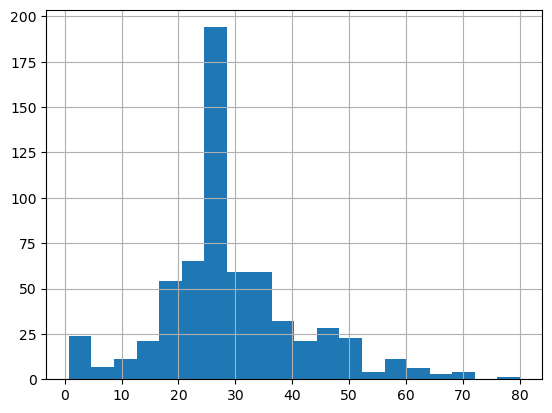

In [18]:
#age distribution of passengers
train_x.age.hist(bins=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

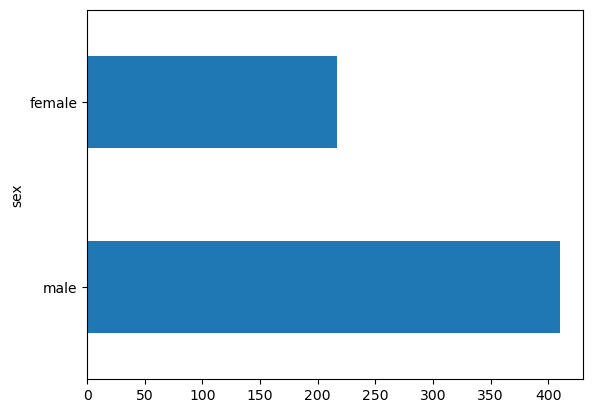

In [19]:
#gender distribuation of the passengers
train_x.sex.value_counts().plot(kind='barh')
plt.show

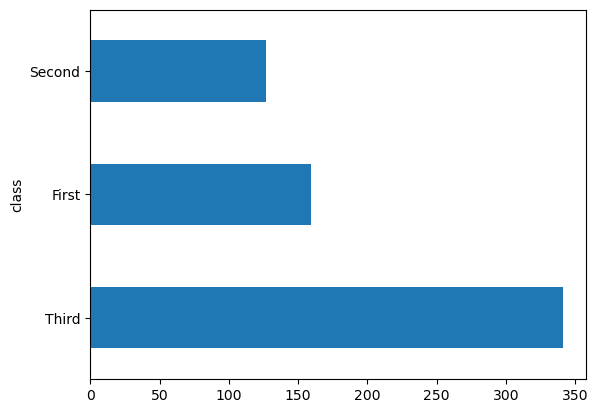

In [20]:
#Distribuation  by class
train_x['class'].value_counts().plot(kind='barh')
plt.show()

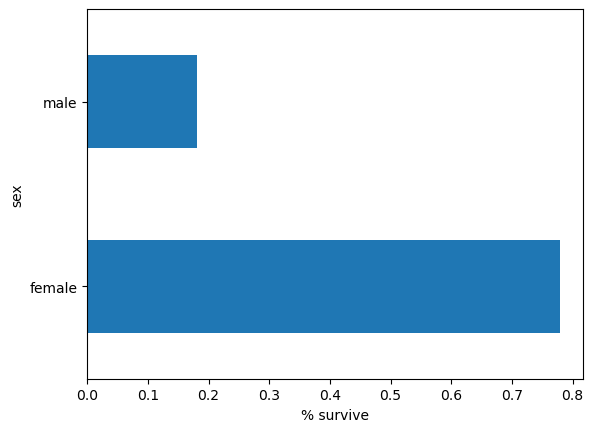

In [21]:
#Analyze the survival chance by sex
pd.concat([train_x,train_y],axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel("% survive")
plt.show()

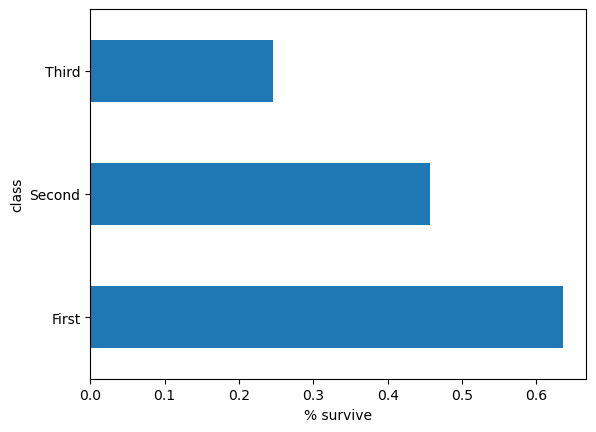

In [22]:
#Analyze the survival chance by class
pd.concat([train_x,train_y],axis=1).groupby('class').survived.mean().plot(kind='barh').set_xlabel("% survive")
plt.show()

In [24]:
#feature column
NUM_COLUMNS=['age','fare']
CAT_COLUMNS=['sex','n siblings spouses','parch','class','deck','embark town','alone']

feature_columns=[]
for feature in NUM_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature,dtype=tf.float32))
    
feature_columns

[NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]